<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Exercise_3_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
800/800 [==============================] - 357s 446ms/step - loss: 0.5917 - binary_accuracy: 0.6787 - val_loss: 0.4948 - val_binary_accuracy: 0.7515
Epoch 2/10
800/800 [==============================] - 351s 438ms/step - loss: 0.5149 - binary_accuracy: 0.7439 - val_loss: 0.4496 - val_binary_accuracy: 0.7978
Epoch 3/10
800/800 [==============================] - 349s 437ms/step - loss: 0.4662 - binary_accuracy: 0.7774 - val_loss: 0.4039 - val_binary_accuracy: 0.8095
Epoch 4/10
800/800 [==============================] - 350s 437ms/step - loss: 0.4381 - binary_accuracy: 0.7942 - val_loss: 0.4155 - val_binary_accuracy: 0.8130
Epoch 5/10
800/800 [==============================] - 351s 439ms/step - loss: 0.4123 - binary_accuracy: 0.8091 - val_loss: 0.3640 - val_binary_accuracy: 0.8404
Epoch 6/10
800/800 [==============================] - 349s 436ms/step - loss: 0.3916 - binary_accuracy: 0.8209 - val

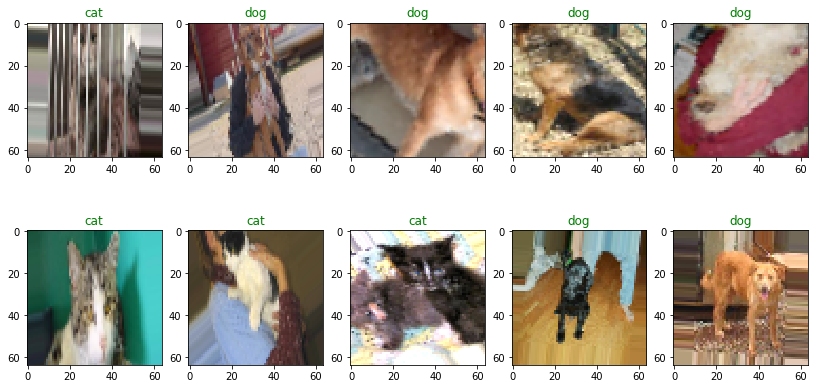

In [3]:
import numpy as np
import sklearn as sk
import sklearn.preprocessing
import sklearn.model_selection
import matplotlib.pyplot as plt
import keras as k
import keras.preprocessing.image

# Data load

DATASET_PATH = '/content/drive/My Drive/dataset/'
IMG_SIZE = 64, 64
BATCH_SIZE = 64

datagen_train = k.preprocessing.image.ImageDataGenerator(
        rotation_range = 30, 
        brightness_range = (.8, 1.2),
        shear_range = 0.3,
        zoom_range = 0.5,
        horizontal_flip = True,
        rescale = 1 / 255
)

datagen_test = k.preprocessing.image.ImageDataGenerator( rescale = 1 / 255 )

data_train = datagen_train.flow_from_directory(
    DATASET_PATH + 'training_set',
    IMG_SIZE,
    class_mode = 'binary',
    batch_size = BATCH_SIZE
)

data_test = datagen_test.flow_from_directory(
    DATASET_PATH + 'test_set',
    IMG_SIZE,
    class_mode = 'binary',
    batch_size = BATCH_SIZE
)

def plot_img(img, label, prediction):
    plt.imshow(img)
    plt.title('dog' if prediction else 'cat', color = 'green' if label == prediction else 'red')

imgs, labels = next(iter(data_train))
fig = plt.figure(figsize = (14, 7))

for i in range(10):
    fig.add_subplot(2, 5, i + 1)
    plot_img(imgs[i], labels[i], labels[i])
  
# Define model

model = k.models.Sequential((
        k.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(64, 64, 3)),
        k.layers.MaxPool2D(),
        k.layers.Conv2D(64, 3, padding='same', activation='relu'),
        k.layers.MaxPool2D(),
        k.layers.Conv2D(32, 3, padding='same', activation='relu'),
        k.layers.MaxPool2D(),
        k.layers.Flatten(),
        k.layers.Dense(128, activation='relu'),
        k.layers.Dense(1, activation=k.activations.sigmoid)
))

model.compile(k.optimizers.Adam(), k.losses.binary_crossentropy, [k.metrics.binary_accuracy])

# Train

model.fit_generator(data_train, steps_per_epoch = 800, epochs = 10, validation_data = data_test, validation_steps = 200)